In [5]:
import ampal
import isambard
import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
import budeff

%matplotlib inline

In [6]:
work_dir = '/home/eva/Documents/structures/structures-obc2-ff96/CC-Di/'

In [7]:
system_name = 'CC-Di'

In [8]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [9]:
import isambard.specifications as specs
import isambard.modelling as modelling

In [10]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

Radius and Interface Angle

In [14]:
def build_dimer(radius, interface_angle):
    sequences = ['GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY']
    gs_dimer = isambard.specifications.CoiledCoil.from_parameters(
        2, 32, radius, 150, REGISTER_ADJUST['f']+interface_angle) # pitch fixed 
    gs_dimer = modelling.pack_side_chains_scwrl(gs_dimer,sequences)
    return gs_dimer

In [15]:
radii = np.arange(4, 6, 0.2)  # (min, max, step)
interface_angles = np.arange(10, 30, 2)

In [16]:
results_array = np.empty((len(radii), len(interface_angles)))
for i, radius in enumerate(radii):
    for j, interface_angle in enumerate(interface_angles):
        dimer_model = build_dimer(radius, interface_angle)
        results_array[i][j] = budeff.get_internal_energy(dimer_model).total_energy

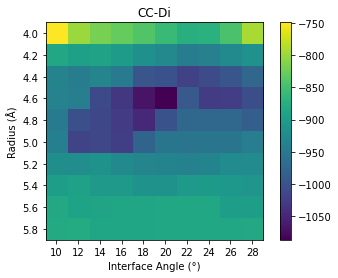

In [17]:
plt.imshow(results_array)
plt.ylabel('Radius (Å)')
plt.xlabel('Interface Angle (°)')
plt.title(system_name)
plt.yticks(range(len(radii)), ['{:.1f}'.format(x) for x in radii])
plt.xticks(range(len(interface_angles)), interface_angles)
plt.colorbar()
plt.savefig(work_dir+'grid_scan_radius_interface_angle_parallel.png')

In [18]:
radius_min = 4.6
interface_angle_min = 20

Radius and pitch

In [19]:
def build_dimer(radius, pitch):
    sequences = ['GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY']
    gs_dimer = isambard.specifications.CoiledCoil.from_parameters(
        2, 32, radius, pitch, REGISTER_ADJUST['f']+interface_angle_min) 
    gs_dimer = modelling.pack_side_chains_scwrl(gs_dimer,sequences)
    return gs_dimer

In [20]:
radii = np.arange(4, 6, 0.2)  # (min, max, step)
pitches = np.arange(140, 260, 5)

In [21]:
results_array = np.empty((len(radii), len(pitches)))
for i, radius in enumerate(radii):
    for j, pitch in enumerate(pitches):
        dimer_model = build_dimer(radius, pitch)
        results_array[i][j] = budeff.get_internal_energy(dimer_model).total_energy

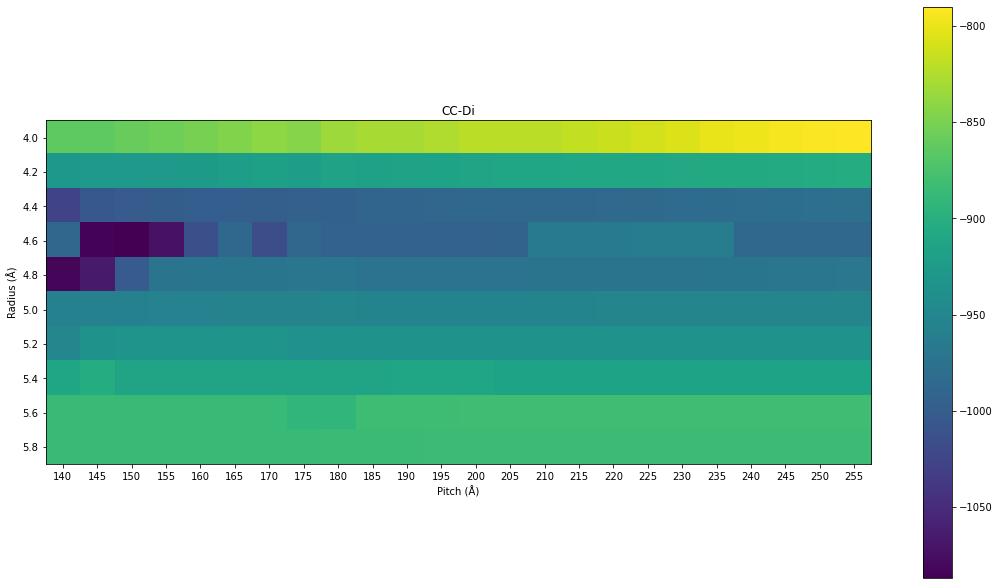

In [22]:
plt.imshow(results_array)
plt.ylabel('Radius (Å)')
plt.xlabel('Pitch (Å)')
plt.title(system_name)
plt.yticks(range(len(radii)), ['{:.1f}'.format(x) for x in radii])
plt.xticks(range(len(pitches)), pitches)
plt.colorbar()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(work_dir+'grid_scan_radius_pitch_parallel.png')

In [23]:
radius_min = 4.6
pitch_min = 150

Interface angle and pitch

In [24]:
def build_dimer(interface_angle, pitch):
    sequences = ['GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY']
    gs_dimer = isambard.specifications.CoiledCoil.from_parameters(
        2, 32, radius_min, pitch, REGISTER_ADJUST['f']+interface_angle) 
    gs_dimer = modelling.pack_side_chains_scwrl(gs_dimer,sequences)
    return gs_dimer

In [25]:
pitches = np.arange(140, 260, 5)
interface_angles = np.arange(10, 30, 2)

In [26]:
results_array = np.empty((len(interface_angles), len(pitches)))
for i, interface_angle in enumerate(interface_angles):
    for j, pitch in enumerate(pitches):
        dimer_model = build_dimer(interface_angle, pitch)
        results_array[i][j] = budeff.get_internal_energy(dimer_model).total_energy

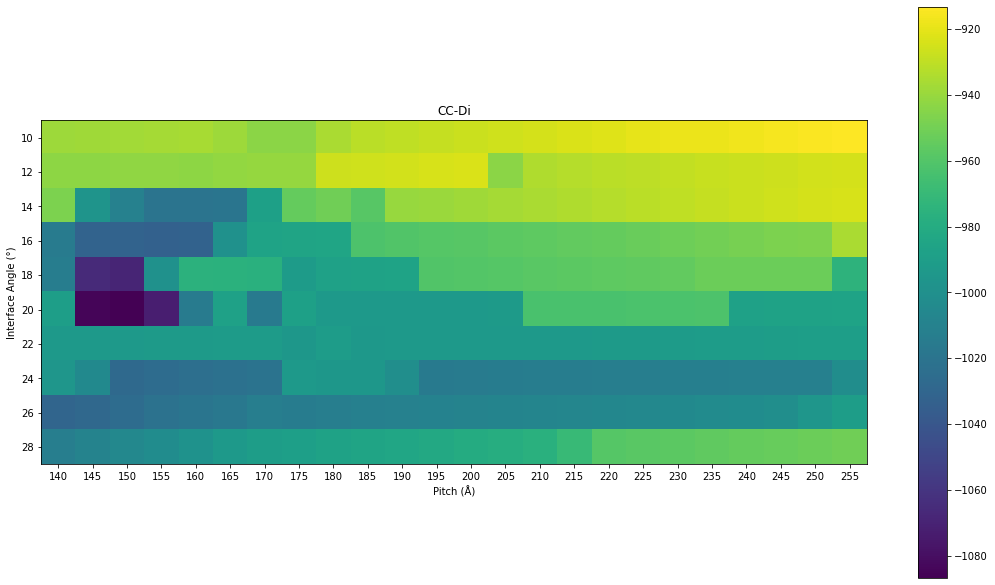

In [29]:
plt.imshow(results_array)
plt.xlabel('Pitch (Å)')
plt.ylabel('Interface Angle (°)')
plt.title(system_name)
plt.xticks(range(len(pitches)), pitches)
plt.yticks(range(len(interface_angles)), interface_angles)
plt.colorbar()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig(work_dir+'grid_scan_interface_angle_pitch_parallel.png')